<a href="https://colab.research.google.com/github/natrivera/tidytuesday/blob/main/2022/2022-05-03/tidy_tuesday_2022_05_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import pandas as pd
import matplotlib as mp
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:

capacity = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2022/2022-05-03/capacity.csv')
wind = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2022/2022-05-03/wind.csv')
solar = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2022/2022-05-03/solar.csv')
average_cost = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2022/2022-05-03/average_cost.csv')


In [ ]:
solar['date']= pd.to_datetime(solar['date'])
solar['alt_type'] = 'solar'
wind['date']= pd.to_datetime(wind['date'])
wind['alt_type'] = 'wind'

In [ ]:
print('capacity shape: ' , capacity.shape)
print('wind shape: ' , wind.shape)
print('solar shape: ' , solar.shape)
print('average_cost shape: ' , average_cost.shape)

capacity shape:  (49, 7)
wind shape:  (328, 3)
solar shape:  (328, 3)
average_cost shape:  (13, 4)


In [ ]:
capacity.head()

,type,year,standalone_prior,hybrid_prior,standalone_new,hybrid_new,total_gw
0,Solar,2014,25.052420,0.00000,19.511700,0.00000,44.564120
1,Solar,2015,33.055120,0.00000,23.763492,0.00000,56.818612
2,Solar,2016,36.977478,0.00000,83.332539,0.00000,120.310017
3,Solar,2017,83.578314,0.00000,104.931034,0.00000,188.509348
4,Solar,2018,138.198438,11.55625,115.544645,17.66671,282.966042


In [ ]:
wind.head()

,date,wind_mwh,wind_capacity
0,2009-01-28,54.096687,50.4
1,2009-01-30,62.326818,98.9
2,2009-02-02,52.531046,99.0
3,2009-02-05,93.790168,150.0
4,2009-02-05,96.546638,51.0


In [ ]:
solar.head()

,date,solar_mwh,solar_capacity
0,2009-02-23,132.096789,30.0
1,2009-03-01,159.502398,30.0
2,2009-03-05,150.760361,19.0
3,2009-05-01,210.070530,12.6
4,2009-05-08,142.783409,230.0


In [ ]:
average_cost

,year,gas_mwh,solar_mwh,wind_mwh
0,2009,57.645367,167.665053,74.325252
1,2010,56.831714,139.802244,65.501337
2,2011,46.000093,110.855044,47.776246
3,2012,44.487503,84.095776,40.114226
4,2013,43.172493,68.881974,28.722950
5,2014,46.080917,57.271352,26.576140
6,2015,47.091314,46.320372,31.153087
7,2016,39.786088,39.311474,25.560013
8,2017,38.122662,37.839645,18.357162
9,2018,34.480123,26.965947,16.665450


In [ ]:
average_cost.shape

(13, 4)

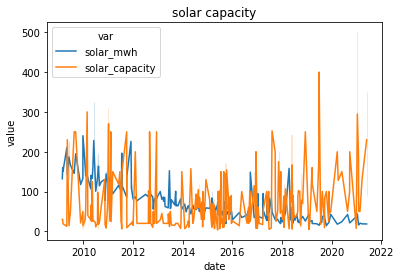

In [ ]:
# unpivot for plot
solar_unpivot = pd.melt(solar, id_vars=['date','alt_type'], var_name='var', value_name='value')
sns.lineplot( data = solar_unpivot , x = 'date' , y = 'value' , hue='var' )
plt.title("solar capacity")
plt.show()

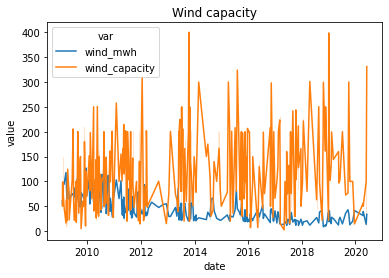

In [ ]:
# unpivot for plot
wind_unpivot = pd.melt(wind, id_vars=['date','alt_type'], var_name='var', value_name='value')
sns.lineplot( data = wind_unpivot , x = 'date' , y = 'value' , hue='var' )
plt.title("Wind capacity")
plt.show()

In [ ]:
rolling_num = 14

wind_unpivot_mwh = wind_unpivot[wind_unpivot['var'].isin(['wind_mwh'])]
wind_unpivot_cap = wind_unpivot[wind_unpivot['var'].isin(['wind_capacity'])]

solar_unpivot_mwh = solar_unpivot[solar_unpivot['var'].isin(['solar_mwh'])]
solar_unpivot_cap = solar_unpivot[solar_unpivot['var'].isin(['solar_capacity'])]

wind_unpivot_mwh['value_ma'] = wind_unpivot_mwh.rolling(rolling_num)['value'].mean()
wind_unpivot_cap['value_ma'] = wind_unpivot_cap.rolling(rolling_num)['value'].mean()
solar_unpivot_mwh['value_ma'] = solar_unpivot_mwh.rolling(rolling_num)['value'].mean()
solar_unpivot_cap['value_ma'] = solar_unpivot_cap.rolling(rolling_num)['value'].mean()

alt_energy_mwh =  pd.concat([wind_unpivot_mwh, solar_unpivot_mwh]).drop('var',axis= 1).reset_index()
alt_energy_cap =  pd.concat([wind_unpivot_cap, solar_unpivot_cap]).drop('var',axis= 1).reset_index()


#alt_energy.head()

# sickomode
#alt_energy_mwh = alt_energy[alt_energy['var'].isin(['solar_mwh' , 'wind_mwh'])].drop('var',axis= 1).reset_index()
#alt_energy_cap = alt_energy[alt_energy['var'].isin(['solar_capacity' , 'wind_capacity'])].drop('var',axis= 1).reset_index()

#alt_energy_mwh['value_ma'] = alt_energy_mwh.groupby('alt_type').rolling(10)['value'].mean()

alt_energy_mwh.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

,index,date,alt_type,value,value_ma
0,0,2009-01-28,wind,54.096687,NaN
1,1,2009-01-30,wind,62.326818,NaN
2,2,2009-02-02,wind,52.531046,NaN
3,3,2009-02-05,wind,93.790168,NaN
4,4,2009-02-05,wind,96.546638,NaN


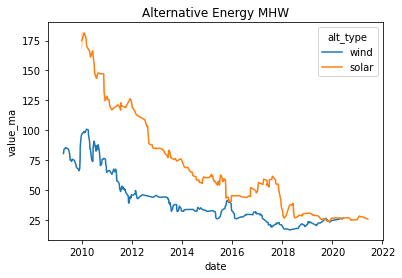

In [ ]:


sns.lineplot( data = alt_energy_mwh , x = 'date' , y = 'value_ma' , hue='alt_type' )
plt.title("Alternative Energy MHW")
plt.show()

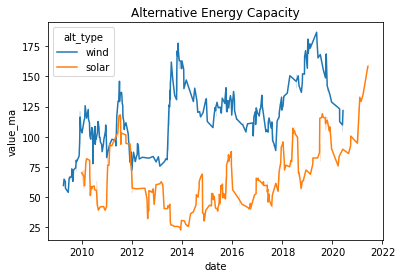

In [ ]:
sns.lineplot( data = alt_energy_cap , x = 'date' , y = 'value_ma' , hue='alt_type' )
plt.title("Alternative Energy Capacity")
plt.show()